# Importing Python Libraries

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Data Loading
Importing data directly from Google Drive

In [290]:
!pip install gdown
import gdown

In [291]:
import gdown
import pandas as pd

# File URL and name
file_url = 'https://drive.google.com/uc?id=193jRRjA_BJfbtpudHIsgqU7nzN-qZZrF'
file_name = 'pipeline_fault_dataset.csv'

# Download the file
gdown.download(file_url, file_name, quiet=False)

# Read the CSV file
try:
    df = pd.read_csv(file_name)
    print("CSV file has been successfully loaded.")
except pd.errors.ParserError as e:
    print("Error parsing CSV file:", e)


Downloading...
From: https://drive.google.com/uc?id=193jRRjA_BJfbtpudHIsgqU7nzN-qZZrF
To: /content/pipeline_fault_dataset.csv
100%|██████████| 501k/501k [00:00<00:00, 60.4MB/s]

CSV file has been successfully loaded.


In [292]:
df.head()

,pipeline_id,length_km,diameters_mm,age_years,material,location,repair_type,repair_duration_hours,pressure,temperature,flow_rate,corrosion_level,deformation_level,leak_detection,pipeline_status
0,1,38.079472,454.271968,32,Cast Iron,Suburban,0ne,9,2.839597,-1.455648,73.701545,3,2,1,1
1,2,95.120716,526.092093,36,Cast Iron,Rural,Replacement,29,9.076803,23.646182,96.398638,2,3,1,1
2,3,73.467400,869.092654,37,PVC,Suburban,Repair,37,2.957548,8.417618,26.116850,0,2,0,0
3,4,60.267190,406.003947,48,PVC,Suburban,Replacement,71,6.730056,6.155475,9.189784,1,1,0,1
4,5,16.445845,882.684716,14,Steel,Urban,Replacement,38,8.926885,13.064279,91.598341,1,4,0,1


Info of the Data, which lists the NULL values as well as Data Type

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pipeline_id            5000 non-null   int64  
 1   length_km              5000 non-null   float64
 2   diameters_mm           5000 non-null   float64
 3   age_years              5000 non-null   int64  
 4   material               5000 non-null   object 
 5   location               5000 non-null   object 
 6   repair_type            5000 non-null   object 
 7   repair_duration_hours  5000 non-null   int64  
 8   pressure               5000 non-null   float64
 9   temperature            5000 non-null   float64
 10  flow_rate              5000 non-null   float64
 11  corrosion_level        5000 non-null   int64  
 12  deformation_level      5000 non-null   int64  
 13  leak_detection         5000 non-null   int64  
 14  pipeline_status        5000 non-null   int64  
dtypes: f

In [294]:
df.isnull().sum()

pipeline_id              0
length_km                0
diameters_mm             0
age_years                0
material                 0
location                 0
repair_type              0
repair_duration_hours    0
pressure                 0
temperature              0
flow_rate                0
corrosion_level          0
deformation_level        0
leak_detection           0
pipeline_status          0
dtype: int64

View all the variables names in the dataset

In [295]:
df.columns

Index(['pipeline_id', 'length_km', 'diameters_mm', 'age_years', 'material',
       'location', 'repair_type', 'repair_duration_hours', 'pressure',
       'temperature', 'flow_rate', 'corrosion_level', 'deformation_level',
       'leak_detection', 'pipeline_status'],
      dtype='object')

Finding the categorical columns/variables in the Dataset

In [296]:
categorical_variables = [feature for feature in df if df[feature].dtypes == 'O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print(categorical_variables)

There are 3 categorical variables
['material', 'location', 'repair_type']


Finding the Numerical columns/variables in the Dataset

In [297]:
numerical_variables = [feature for feature in df if df[feature].dtypes != 'O']
print('There are {} numerical variables'.format(len(numerical_variables)))
print(numerical_variables)

There are 12 numerical variables
['pipeline_id', 'length_km', 'diameters_mm', 'age_years', 'repair_duration_hours', 'pressure', 'temperature', 'flow_rate', 'corrosion_level', 'deformation_level', 'leak_detection', 'pipeline_status']


In [298]:
df.head()

,pipeline_id,length_km,diameters_mm,age_years,material,location,repair_type,repair_duration_hours,pressure,temperature,flow_rate,corrosion_level,deformation_level,leak_detection,pipeline_status
0,1,38.079472,454.271968,32,Cast Iron,Suburban,0ne,9,2.839597,-1.455648,73.701545,3,2,1,1
1,2,95.120716,526.092093,36,Cast Iron,Rural,Replacement,29,9.076803,23.646182,96.398638,2,3,1,1
2,3,73.467400,869.092654,37,PVC,Suburban,Repair,37,2.957548,8.417618,26.116850,0,2,0,0
3,4,60.267190,406.003947,48,PVC,Suburban,Replacement,71,6.730056,6.155475,9.189784,1,1,0,1
4,5,16.445845,882.684716,14,Steel,Urban,Replacement,38,8.926885,13.064279,91.598341,1,4,0,1


#Exploratory Data Analysis
Get summary statistics for all numerical variables

In [299]:
df[numerical_variables].describe()

,pipeline_id,length_km,diameters_mm,age_years,repair_duration_hours,pressure,temperature,flow_rate,corrosion_level,deformation_level,leak_detection,pipeline_status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,2500.500000,50.186367,542.338412,24.762800,50.422400,5.433435,14.912155,50.464062,2.014600,2.005200,0.49000,0.69380
std,1443.520003,28.673731,257.054858,14.123046,28.690071,2.578492,14.364129,28.777603,1.420137,1.427298,0.49995,0.46096
min,1.000000,1.001152,100.047544,1.000000,1.000000,1.000992,-9.999723,1.017824,0.000000,0.000000,0.00000,0.00000
25%,1250.750000,25.142418,322.431318,13.000000,26.000000,3.202842,2.328001,25.716228,1.000000,1.000000,0.00000,0.00000
50%,2500.500000,50.500854,537.374417,24.000000,50.000000,5.440274,15.005693,50.359145,2.000000,2.000000,0.00000,1.00000
75%,3750.250000,75.061985,760.034439,37.000000,76.000000,7.644744,27.001377,75.479484,3.000000,3.000000,1.00000,1.00000
max,5000.000000,99.972050,999.554671,49.000000,99.000000,9.997589,39.989469,99.927600,4.000000,4.000000,1.00000,1.00000


VisualiZing the relationship between features

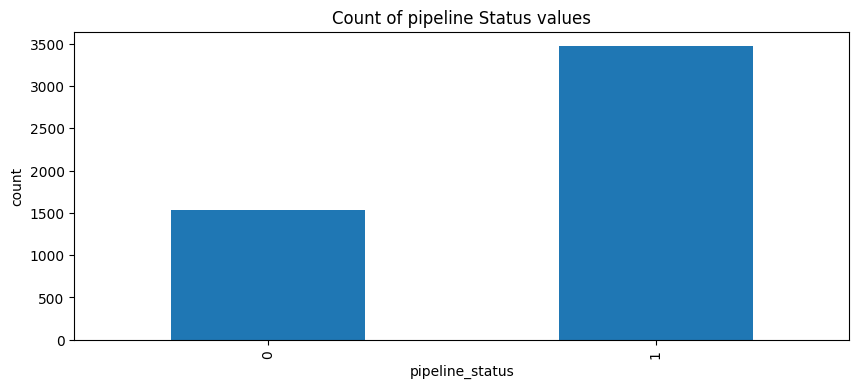

In [300]:
pipeline_status_count = df.groupby('pipeline_status').size()

fig,ax = plt.subplots(figsize=(10,4))

pipeline_status_count.plot.bar(ax=ax)

plt.xlabel('pipeline_status')
plt.ylabel('count')
plt.title('Count of pipeline Status values');

From the bar chart above, we can notice that in the target variable, pipeline_status, there are more failed pipelines than pipelines that did not fail in this dataset.

**1.Relationship between categorical variables and pipeline_status**

In [301]:
grouped_material = df.groupby(['material','pipeline_status']).size().unstack()
grouped_material

pipeline_status,0,1
material,,
Cast Iron,404,852
HDPE,358,891
PVC,380,868
Steel,389,858


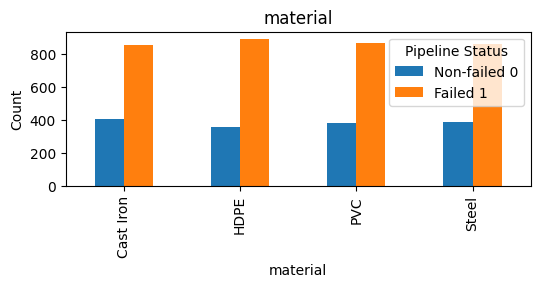

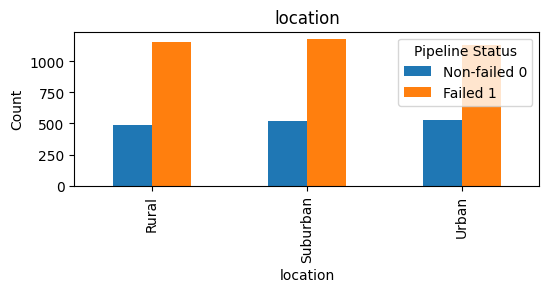

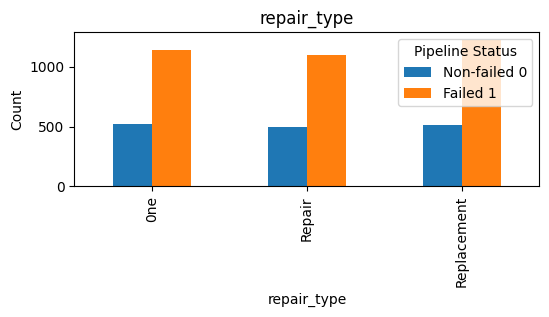

In [302]:
categoricals = [feature for feature in df if df[feature].dtypes == 'O' and feature != 'pipeline_id']

for feat in categoricals:
    grouped = df.groupby([feat,'pipeline_status']).size().unstack()

    fig, ax = plt.subplots(figsize=(6,2))

    grouped.plot.bar(ax = ax)

    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.title(feat)
    plt.legend(title='Pipeline Status', labels=['Non-failed 0', 'Failed 1'])
    plt.show();

**2.Relationship between numerical variables and pipeline_status**

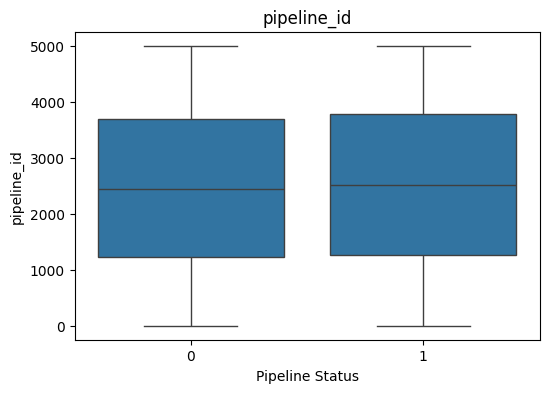

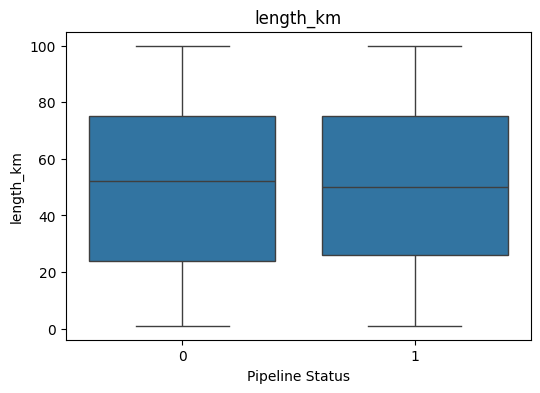

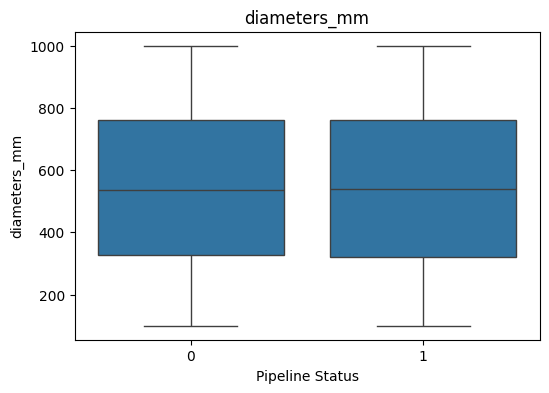

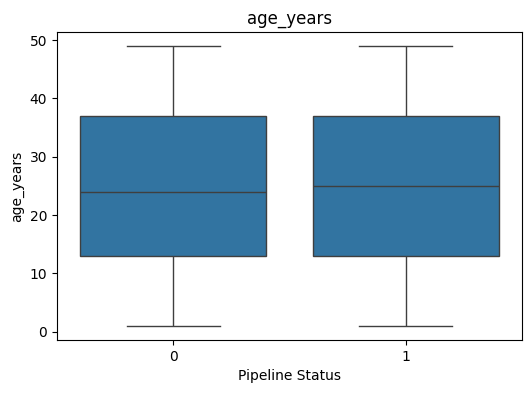

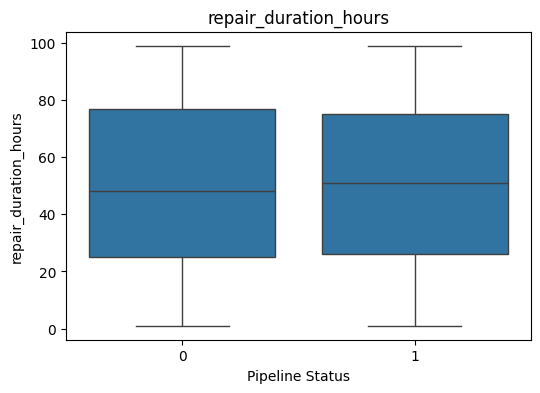

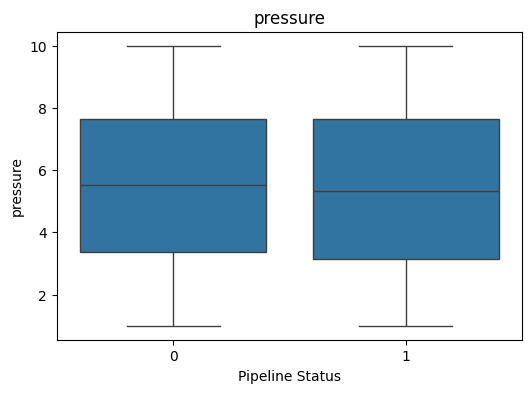

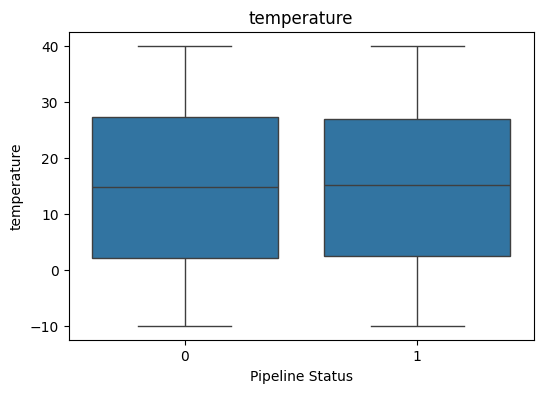

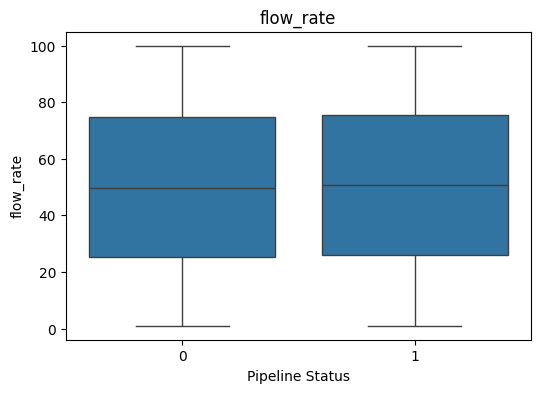

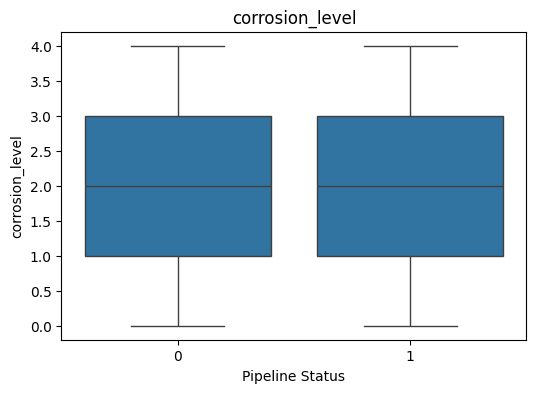

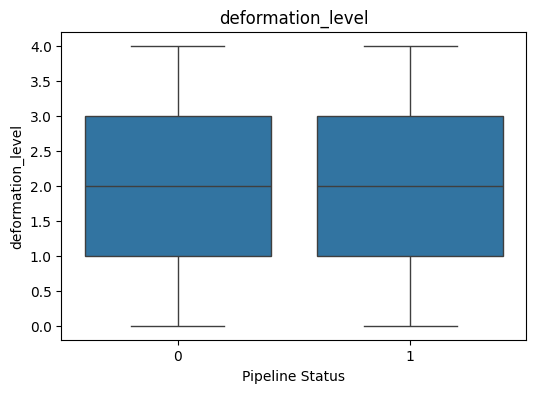

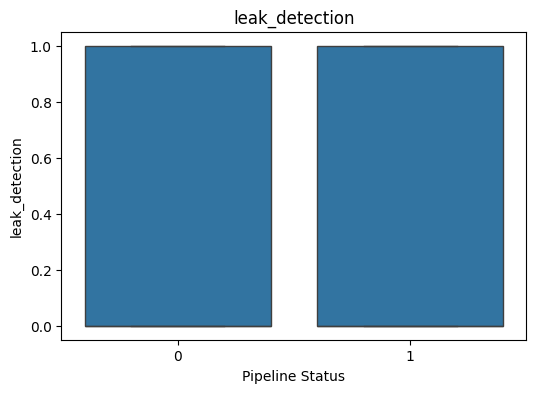

In [303]:
num_variables = [feature for feature in df if df[feature].dtypes != 'O'and feature != 'pipeline_status']

for feature in num_variables:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='pipeline_status', y=feature, data=df)
    plt.xlabel('Pipeline Status')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

**3. Heat map to show correlation between the numerical features**

In [304]:
correlation = df[numerical_variables].drop(columns=['pipeline_id']).corr()
correlation['pipeline_status'].sort_values(ascending= False)

pipeline_status          1.000000
deformation_level        0.019751
flow_rate                0.014906
age_years                0.012901
repair_duration_hours    0.007936
temperature              0.004663
diameters_mm            -0.000209
length_km               -0.004599
corrosion_level         -0.008143
leak_detection          -0.011987
pressure                -0.014032
Name: pipeline_status, dtype: float64

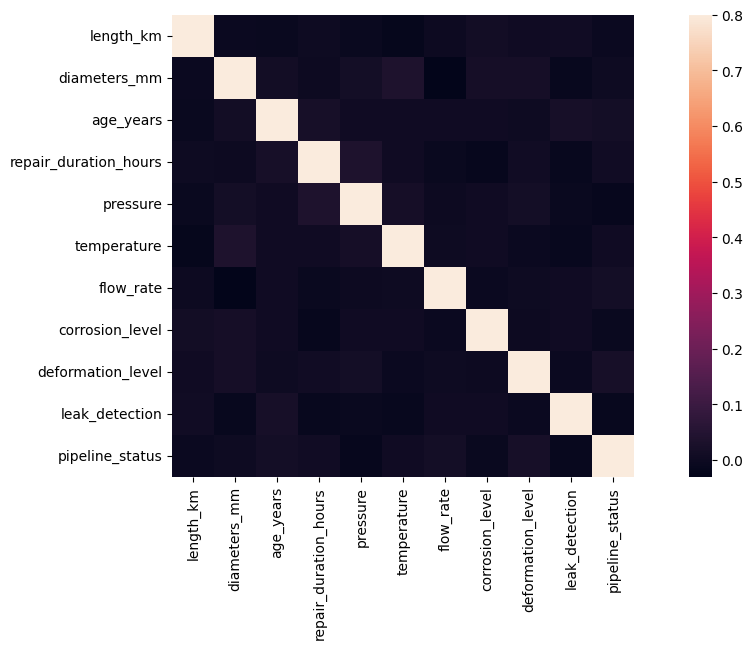

In [305]:
fig,ax = plt.subplots(figsize=(14,6))
sns.heatmap(correlation, square = True, vmax = 0.8);

**4. Checking the Skewness of the numerical variables**

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


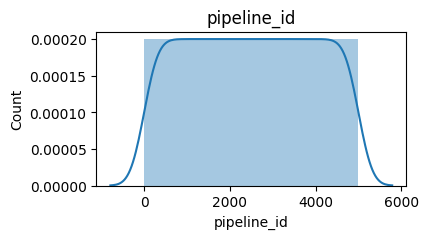

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


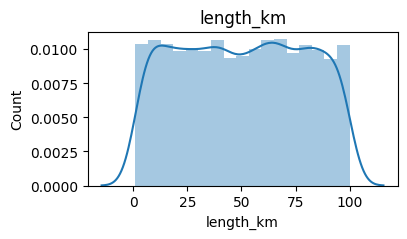

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


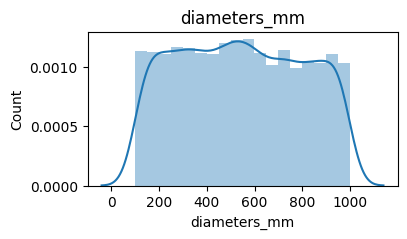

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


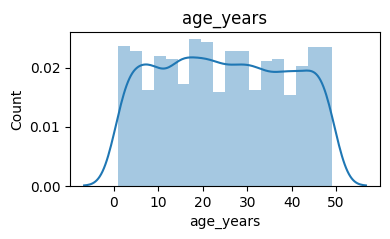

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


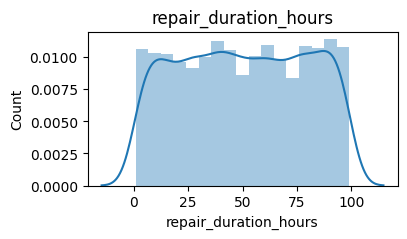

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


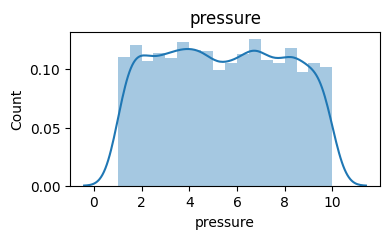

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


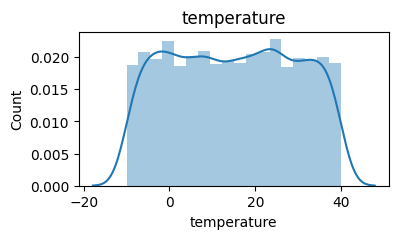

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


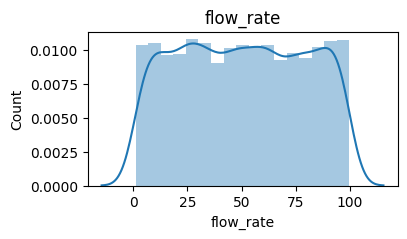

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


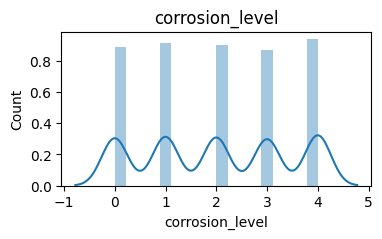

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


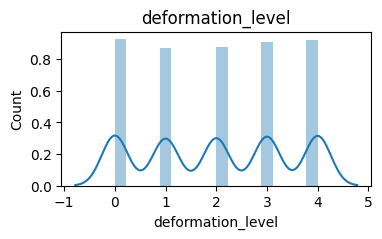

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


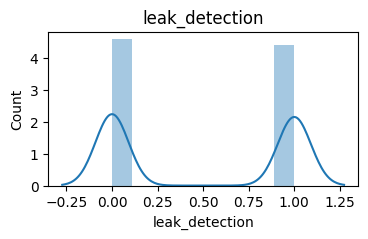

<ipython-input-306-b2ca51718aaa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], ax=ax)


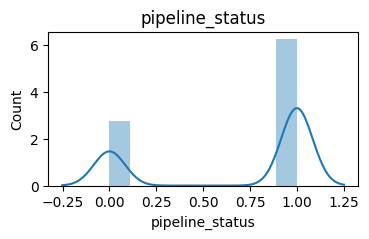

In [306]:
df[numerical_variables].skew().sort_values(ascending=False)
for feature in numerical_variables:
    fig, ax = plt.subplots(figsize=(4,2))
    sns.distplot(df[feature], ax=ax)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show();


______________________________________________________________________________________________________
#Feature Engineering

Dropping the columns we don't need.

In [307]:
df = df.drop('pipeline_id', axis = 1)

In [308]:
df['repair_type'].value_counts()

repair_type
Replacement    1742
0ne            1665
Repair         1593
Name: count, dtype: int64

Using One Hot Encoding converting categorical data to numerical.

In [309]:
df=pd.get_dummies(df,columns=['material','location','repair_type'],dtype=int)

#Model Building
1.Divide the data set into X->features and y->Label

In [310]:
X = df.drop('pipeline_status', axis = 1)
y = df['pipeline_status']

In [311]:
X.head()

,length_km,diameters_mm,age_years,repair_duration_hours,pressure,temperature,flow_rate,corrosion_level,deformation_level,leak_detection,material_Cast Iron,material_HDPE,material_PVC,material_Steel,location_Rural,location_Suburban,location_Urban,repair_type_0ne,repair_type_Repair,repair_type_Replacement
0,38.079472,454.271968,32,9,2.839597,-1.455648,73.701545,3,2,1,1,0,0,0,0,1,0,1,0,0
1,95.120716,526.092093,36,29,9.076803,23.646182,96.398638,2,3,1,1,0,0,0,1,0,0,0,0,1
2,73.467400,869.092654,37,37,2.957548,8.417618,26.116850,0,2,0,0,0,1,0,0,1,0,0,1,0
3,60.267190,406.003947,48,71,6.730056,6.155475,9.189784,1,1,0,0,0,1,0,0,1,0,0,0,1
4,16.445845,882.684716,14,38,8.926885,13.064279,91.598341,1,4,0,0,0,0,1,0,0,1,0,0,1


2. Scaling the Independent variables

In [312]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(X)

X = pd.DataFrame(scaled, columns = X.columns)
X.head()

,length_km,diameters_mm,age_years,repair_duration_hours,pressure,temperature,flow_rate,corrosion_level,deformation_level,leak_detection,material_Cast Iron,material_HDPE,material_PVC,material_Steel,location_Rural,location_Suburban,location_Urban,repair_type_0ne,repair_type_Repair,repair_type_Replacement
0,0.374639,0.393798,0.645833,0.081633,0.204367,0.170918,0.734849,0.75,0.50,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.950982,0.473642,0.729167,0.285714,0.897652,0.673064,0.964321,0.50,0.75,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.732198,0.854963,0.750000,0.367347,0.217477,0.368426,0.253757,0.00,0.50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.598823,0.340138,0.979167,0.714286,0.636803,0.323174,0.082620,0.25,0.25,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.156053,0.870073,0.270833,0.377551,0.880988,0.461380,0.915789,0.25,1.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


3. Splitting the Dataset into train and test data

In [313]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

4. Performing a cross validation to determine the best machine learning algorithm for our datatset

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression     0.695   0.695000  1.000000  0.820059
1        Random Forest     0.689   0.695918  0.981295  0.814328
2                  SVC     0.695   0.695000  1.000000  0.820059
3        Decision Tree     0.575   0.702703  0.673381  0.687730
4                  KNN     0.617   0.688406  0.820144  0.748523
5          Naive Bayes     0.695   0.695000  1.000000  0.820059
6           Perceptron     0.602   0.699865  0.748201  0.723227


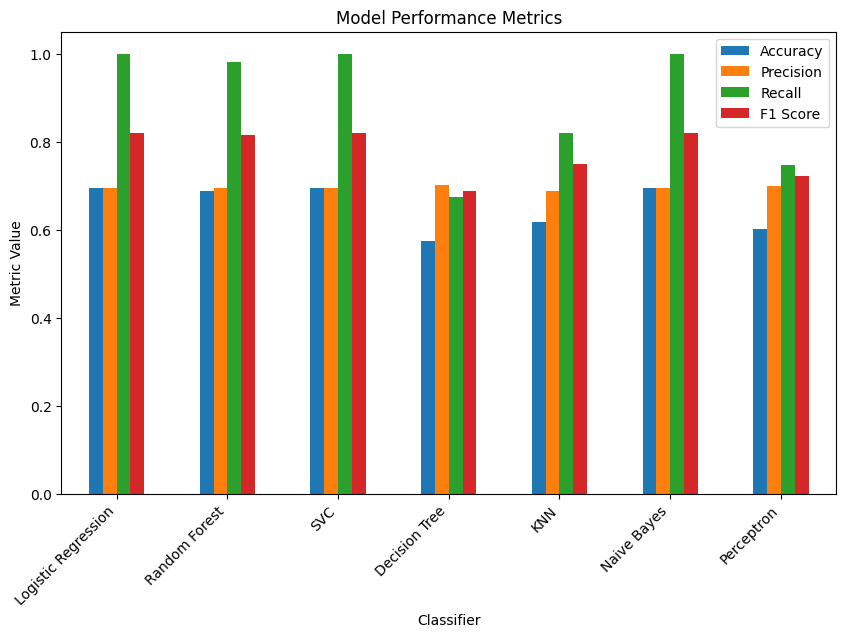

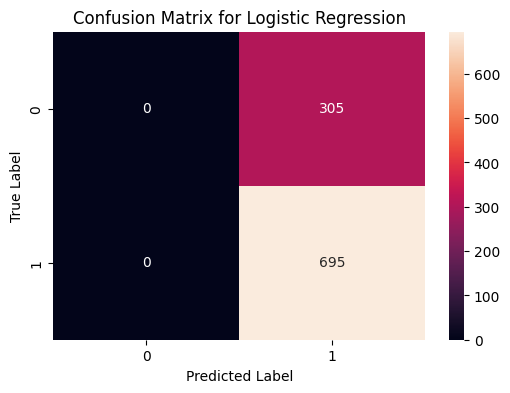

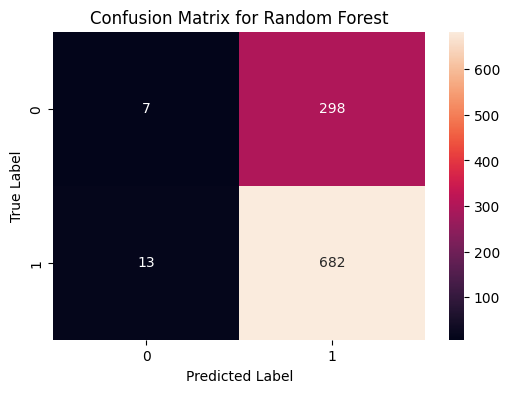

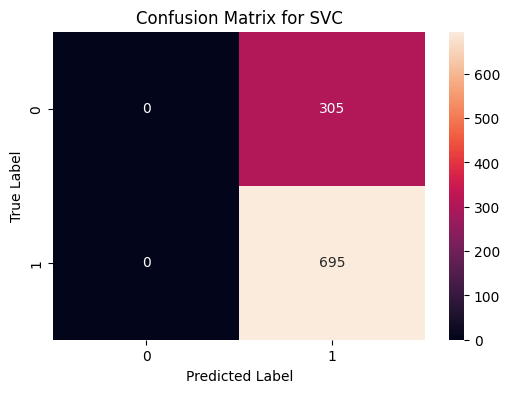

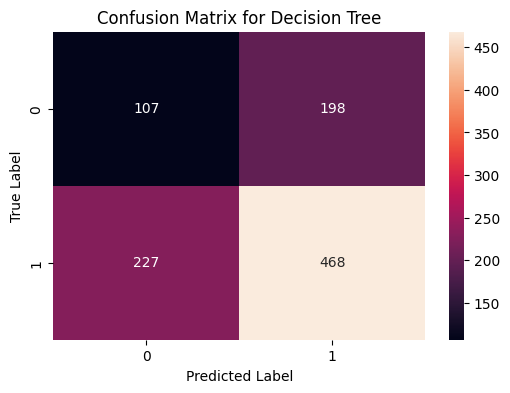

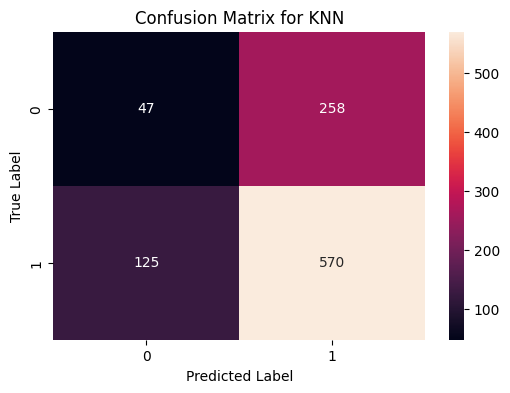

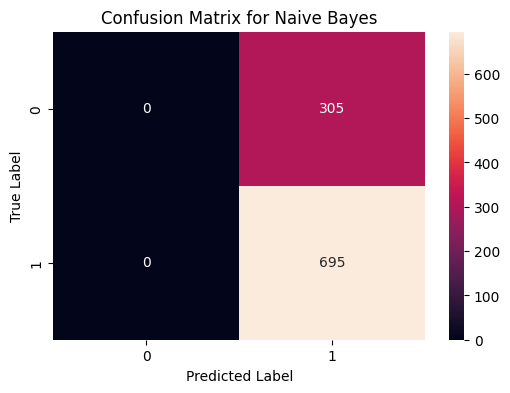

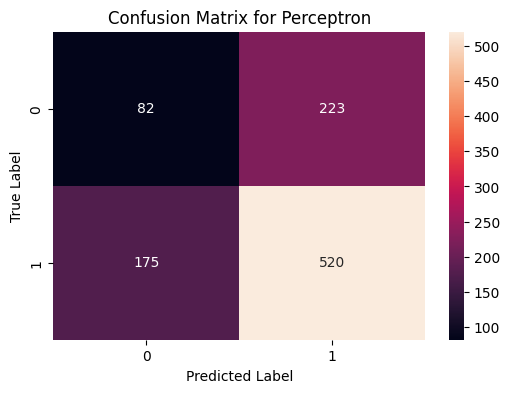

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(),
}

# Training each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)

# Making predictions
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

# Plotting metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = []
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    values.append([name,accuracy, precision, recall, f1])

df_scores = pd.DataFrame(values, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

print(df_scores)


fig, ax = plt.subplots(figsize=(10, 6))
df_scores.plot.bar(ax=ax)
ax.set_xticklabels(df_scores['Model'], rotation=45, ha='right')
plt.xlabel("Classifier")
plt.ylabel("Metric Value")
plt.title("Model Performance Metrics")
plt.show()

# Plotting confusion matrix
for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"Confusion Matrix for {name}")
    plt.show()


4. Hyper Parameter Tuning.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

                 Model                         Best Parameters  Accuracy  \
0  Logistic Regression            {'C': 0.01, 'penalty': 'l2'}   0.69350   
1        Random Forest  {'max_depth': 10, 'n_estimators': 100}   0.69525   
2                  SVC          {'C': 0.1, 'kernel': 'linear'}   0.69350   
3        Decision Tree   {'criterion': 'gini', 'max_depth': 5}   0.68775   
4          Naive Bayes                                      {}   0.69325   
5                  KNN                      {'n_neighbors': 7}   0.64250   
6           Perceptron                           {'eta0': 0.1}   0.58000   

     Recall  Precision  F1 Score  
0  1.000000   0.695000  0.820059  
1  0.995683   0.695477  0.818935  
2  1.000000   0.695000  0.820059  
3  0.985612   0.694022  0.814507  
4  1.000000   0.695000  0.820059  
5  0.880576   0.701835  0.781110  
6  0.748201   0.699865  0.723227  


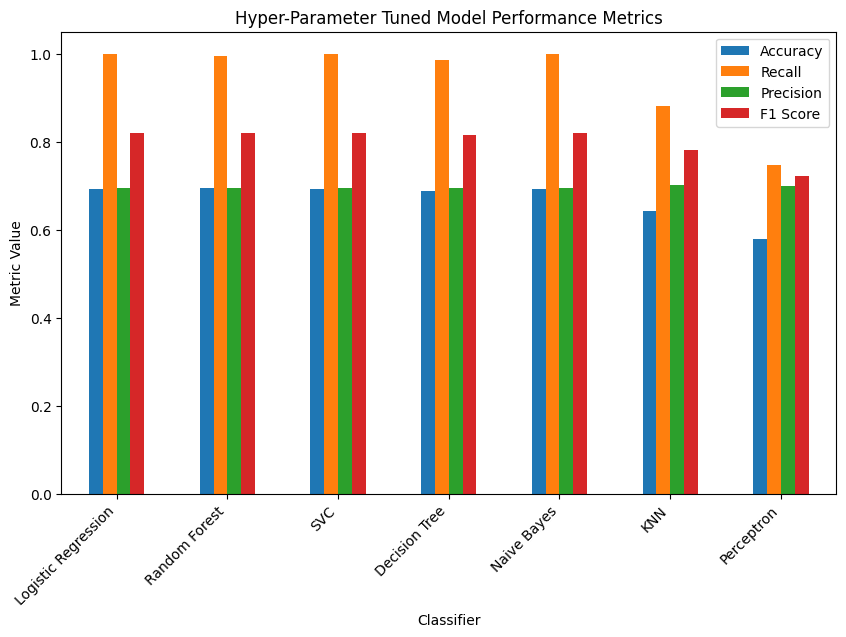

In [315]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Perceptron": Perceptron(),
}

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10], "penalty": ["l1", "l2"]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10]},
    "SVC": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "Decision Tree": {"criterion": ["gini", "entropy"], "max_depth": [None, 5, 10]},
    "Naive Bayes": {},
    "KNN": {"n_neighbors": [3, 5, 7]},
    "Perceptron": {"eta0": [0.01, 0.1, 0.5]},
}

# Performing grid search with cross-validation
kfold = StratifiedKFold(n_splits=5)
results = []
for name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[name], cv=kfold, scoring="accuracy", return_train_score=True)
    grid_search.fit(X_train, y_train)

    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Accuracy": grid_search.best_score_,
        "Recall": recall_score(y_test, grid_search.best_estimator_.predict(X_test)),
        "Precision": precision_score(y_test, grid_search.best_estimator_.predict(X_test)),
        "F1 Score": f1_score(y_test, grid_search.best_estimator_.predict(X_test)),
    })


df_results = pd.DataFrame(results)
print(df_results)
df_results.drop(columns=['Best Parameters'],inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df_results.plot.bar(ax=ax)
ax.set_xticklabels(df_results['Model'], rotation=45, ha='right')
plt.xlabel("Classifier")
plt.ylabel("Metric Value")
plt.title("Hyper-Parameter Tuned Model Performance Metrics")
plt.show()
